# 🕶️ Build the LeNet-5 from Scratch!

## Predicting Handwritten Digits

<div align="center">
    <img src="MNIST Background Edited.jpg" alt="MNIST Matrix" style="width: 700px;"> 
</div>
<div align="center">
  If you look really closely, it's the MNIST dataset!
</div>

Dubbed as the "Hello World" of datasets, MNIST represents one of the most fundamental resources in machine learning. 

In this notebook, we will walk you through the process of building a **convolutional neural network** to predict handwritten digits. Specifically, we will learn how to build a **LeNet-5** model from scratch! 

If you're up for it, we can take a step further by applying various techniques to reduce overfitting and improve performance.

---

### <font color='000000'>Table of contents<font><a class='anchor' id='top'></a>

1. [Introduction](#section-one)  
    
2. [Get Data](#section-two)
    
3. [Discover & Visualize Data](#section-three)
    
4. [Train Model](#section-four)
    
5. [Test Model](#section-five) 

6. [A Step Further](#section-six)
    
7. [Conclusion](#section-seven)

---

<a class="anchor" id="section-one"></a>
## 1. Introduction

We will start by loading the dataset and visualizing the images inside it. Next, we will perform **data augmentation** which creates new training variations so as to reduce overfitting.

Subsequently, we'll build the original **LeNet-5 model**, train it and then use it to predict the label of the handwritten digits. 

We can take a step further by modifying the LeNet-5 model using several techniques to speed up training, avoid overfitting and improve generalization.

---

<a class="anchor" id="section-two"></a>
## 2. Get Data

* Load the training and test data.
* Normalize the images to a range from 0 to 1.
* Reshape the data into a 3D array.

In [1]:
# Import libraries

import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
# Read the CSV file

file1 = 'train.csv'
file2 = 'test.csv'

train_data = pd.read_csv(file1)
test_data = pd.read_csv(file2)

In [3]:
# Set the X and y variables

X_train = train_data[train_data.columns[~train_data.columns.isin(['label'])]].copy()
y_train = train_data['label'].copy()

In [4]:
# Normalize the images by dividing by the 255 pixel values to get a range from 0 to 1

X_train = X_train / 255.
X_test = test_data / 255.

In [5]:
# Reshape the data into a 3D array as an input for the model later

X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [6]:
# Convert to categorical variables

y_train = to_categorical(y_train, num_classes = 10)

In [7]:
# Split into training and validation sets

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 3)

---

<a class="anchor" id="section-three"></a>
## 3. Discover & Visualize Data 

* Take a look at the digits from the training set.

In [8]:
# Create a function to plot the digits

def view_digits(data):
    plt.figure(figsize=(20, 5))
    for i in range(30):
        plt.subplot(3, 10, i + 1)
        plt.imshow(data[i], cmap = plt.cm.binary)
        plt.axis('off')
    plt.show()

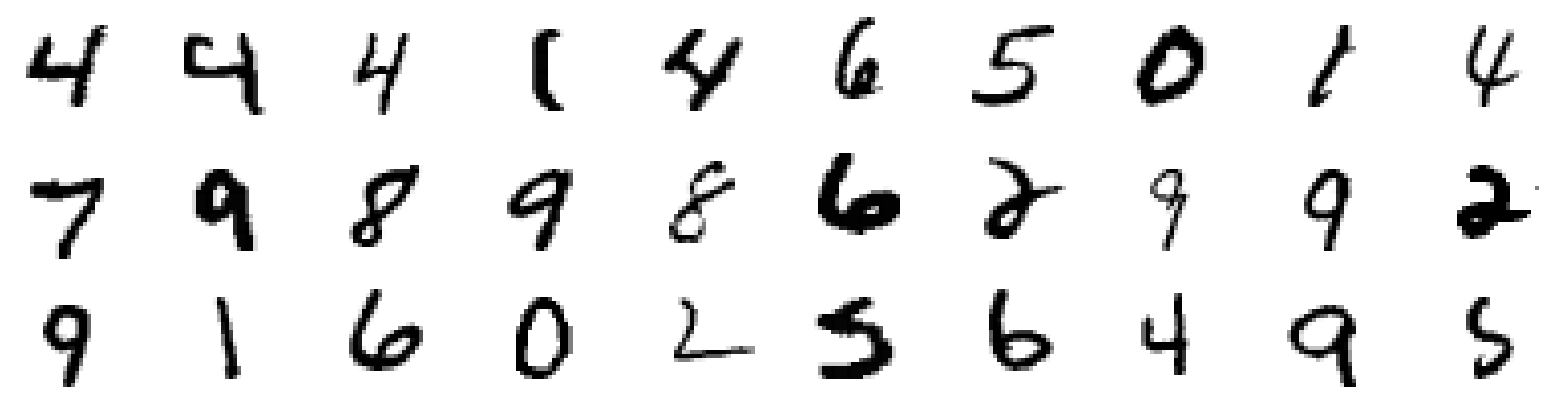

In [9]:
# Take a look at the first 30 digits

view_digits(X_train)

---

<a class="anchor" id="section-four"></a>
## 4. Train Model

* Build the LeNet-5 model.
* Train the LeNet-5 model and apply early stopping.

### Understanding the LeNet-5 Architecture:

In 1998, Yann LeCun, Léon Bottou, Yoshua Bengio and Pattrick Haffner introduced a CNN structure called LeNet-5. It quickly became one of the most well known models in the field of computer vision.

The LeNet-5 is a neural network that is composed of **five layers** with learnable parameters, hence the name. Of the five layers, there are **three 5x5 convolution** layers and **two 2x2 pooling** layers. Stacked on top of these five layers are **two fully connected** layers. As for the activation function, we used tanh for all the layers except the final layer which uses softmax.

Next, we compile the model using the adam optimizer and categorical cross-entropy cost function. This helps us to  penalize bad predictions more, thus allowing the model to converge faster. Finally, we implemented **early stopping** to stop training at minimum validation error.

In [10]:
# Import libraries

from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Activation, Flatten, Dense
from keras.losses import categorical_crossentropy
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [11]:
# Build the LeNet-5 architecture

model = Sequential()

model.add(Conv2D(6, kernel_size = (5, 5), strides = 1, activation = 'tanh', input_shape = (28, 28, 1), padding = 'same'))
model.add(AveragePooling2D(pool_size = (2, 2)))

model.add(Conv2D(16, kernel_size = (5, 5), strides = 1, activation = 'tanh', padding = 'valid'))
model.add(AveragePooling2D(pool_size = (2, 2)))

model.add(Conv2D(120, kernel_size = (5, 5), activation = 'tanh'))

model.add(Flatten())
model.add(Dense(84, activation = 'tanh'))
model.add(Dense(10, activation = 'softmax'))

Metal device set to: Apple M1 Pro


2023-02-04 21:55:13.527139: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-04 21:55:13.527272: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
# Compile the model

model.compile(optimizer = 'adam', loss = categorical_crossentropy, metrics = ['accuracy'])

In [13]:
# Use Early stopping and model checkpoint

early_stopping = EarlyStopping(patience = 10)
model_checkpoint = ModelCheckpoint('lenet5_model.h5', save_best_only = True)

In [14]:
# Train the model

history = model.fit(X_train, y_train, batch_size = 64, epochs = 50, validation_data = (X_val, y_val), 
                    callbacks = [early_stopping, model_checkpoint])

Epoch 1/50


2023-02-04 21:55:13.697522: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-04 21:55:13.878017: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


493/493 [==============================] - ETA: 0s - loss: 0.3654 - accuracy: 0.8920

2023-02-04 21:55:21.016147: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


493/493 [==============================] - 8s 16ms/step - loss: 0.3654 - accuracy: 0.8920 - val_loss: 0.2023 - val_accuracy: 0.9367
Epoch 2/50
493/493 [==============================] - 8s 16ms/step - loss: 0.1464 - accuracy: 0.9554 - val_loss: 0.1313 - val_accuracy: 0.9595
Epoch 3/50
493/493 [==============================] - 8s 16ms/step - loss: 0.0988 - accuracy: 0.9697 - val_loss: 0.0963 - val_accuracy: 0.9709
Epoch 4/50
493/493 [==============================] - 8s 16ms/step - loss: 0.0725 - accuracy: 0.9784 - val_loss: 0.0886 - val_accuracy: 0.9721
Epoch 5/50
493/493 [==============================] - 8s 16ms/step - loss: 0.0572 - accuracy: 0.9826 - val_loss: 0.0665 - val_accuracy: 0.9784
Epoch 6/50
493/493 [==============================] - 8s 16ms/step - loss: 0.0427 - accuracy: 0.9873 - val_loss: 0.0647 - val_accuracy: 0.9788
Epoch 7/50
493/493 [==============================] - 8s 17ms/step - loss: 0.0349 - accuracy: 0.9894 - val_loss: 0.0635 - val_accuracy: 0.9804
Epoch 8/50

In [15]:
# Load the best model from model checkpoint

model = keras.models.load_model('lenet5_model.h5')

---

<a class="anchor" id="section-five"></a>
## 5. Test Model

* Use the model to predict the images in the test set.
* Select the index with maximum probability.
* Compile predictions and labels into a dataframe for submission.

In [16]:
# Get predictions

pred = model.predict(X_test)

pred

 63/875 [=>............................] - ETA: 1s

2023-02-04 21:57:50.654157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


875/875 [==============================] - 2s 2ms/step


array([[2.98331338e-06, 1.22432471e-06, 9.99961257e-01, ...,
        9.05545312e-06, 5.71429564e-06, 2.14026227e-06],
       [9.99982953e-01, 1.60037725e-08, 6.08167966e-06, ...,
        3.69542136e-07, 1.73514934e-07, 1.29779357e-06],
       [8.80813900e-07, 9.98681003e-07, 9.81518042e-07, ...,
        1.15769967e-06, 1.02690559e-04, 9.99668837e-01],
       ...,
       [2.01633465e-08, 4.73146144e-07, 2.93082110e-07, ...,
        8.86151611e-07, 2.39956444e-06, 8.05288255e-06],
       [1.49770881e-06, 1.17218292e-06, 2.58766681e-06, ...,
        1.15746385e-04, 8.54067548e-06, 9.94079471e-01],
       [7.05971445e-07, 6.69807650e-06, 9.99960899e-01, ...,
        2.64702265e-07, 8.52614357e-06, 1.03248362e-06]], dtype=float32)

In [17]:
# Select index with maximum probability and convert to 1D array

pred = np.argmax(pred, axis = 1)
pred = pd.Series(pred, name = "Label")

In [18]:
# Compile predictions into a table 

submit_df = pd.DataFrame(columns = ['ImageId', 'Label'])
submit_df['ImageId'] = pd.Series(range(1, 28001), name = "ImageId")
submit_df['Label'] = pred

# Save file 
submit_df.to_csv('submissions1.csv', header = True, index = False)
submit_df.head(30)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


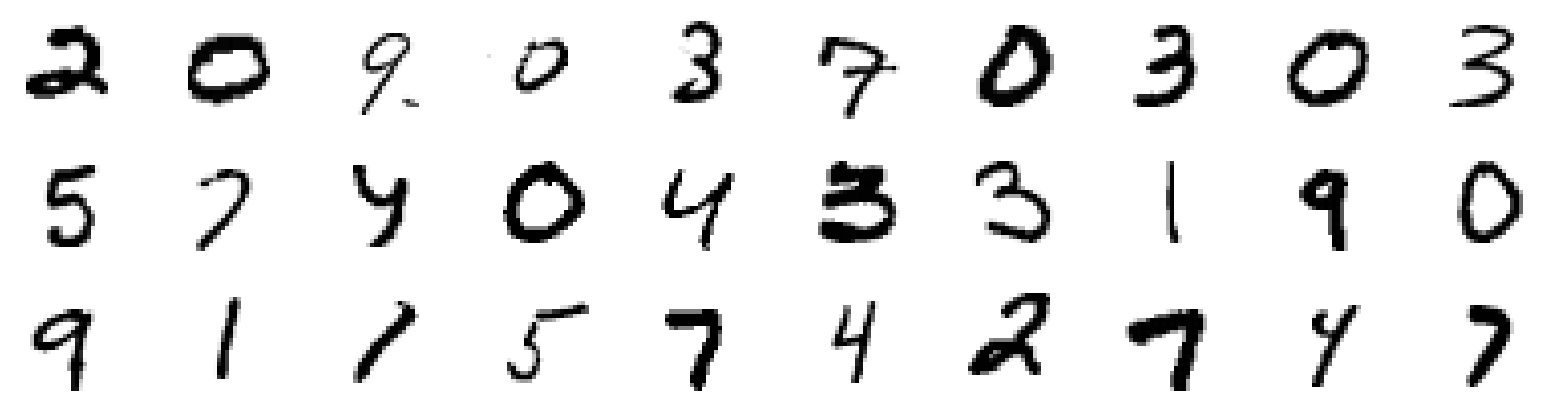

In [19]:
# Take a look at the first 30 actual digits

view_digits(X_test)

### Observations: 

* Looking at the first 30 digits of the test set, we can see one misprediction (at ImageId 3) where 0 is predicted to be a 9.
* This means that the model is overfitting and is likely to mispredict other digits in the test set.

---

<a class="anchor" id="section-six"></a>
## 6. A Step Further

* In order to prevent overfitting, the following regularization techniques were used:
    * Data augmentation
    * Batch normalization
    * Dropout
* Other techniques that were used to improve the general performance of the model:
    * ReLU activation function
    * Max pooling
    * Two 3x3 convolution layers

### Understanding Data Augmentation:

**Data augmentation** is a regularization technique that creates new training samples by making slight variations in the orientation, position and size of the images.

We will use the **image data generator** to **rotate, zoom and shift** the height and width of our images. We **disabled horizontal and vertical flip** to avoid mixing up certain digits like 6 and 9.

In short, data agumentation improves the general performance of the model by **reducing overfitting** and **increasing generalization**.

In [20]:
# Import libraries

from keras.preprocessing.image import ImageDataGenerator

In [21]:
# Augment the digits

datagen = ImageDataGenerator(
    rotation_range = 10,
    height_shift_range = .1,
    width_shift_range = .1,
    zoom_range = .1, 
    horizontal_flip = False,
    vertical_flip = False
)

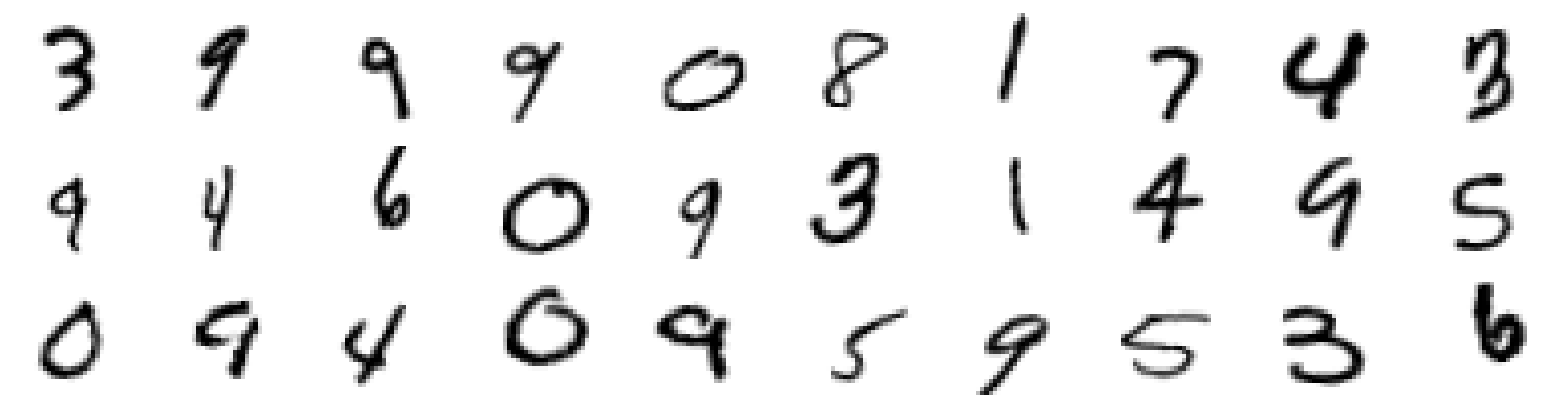

In [22]:
# Take a look at the first 13 augmented digits

datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size = 32):
    view_digits(X_batch)
    break

### Understanding the Modified LeNet-5 Architecture:

This model is very similar to the LeNet-5 model above but with several adjustments.

**Batch normalization** is added after the activation function of each hidden layer. This allows the model to learn the mean and scale of each layer's inputs. To prevent overfitting, we also applied **dropout** to the top two layers (excluding output layer). A dropout rate of 0.5 means that, at each training step, neurons have a 50% probability of being ignored.

The following changes were made to improve the model's performance. We changed the activation function from tanh to **ReLU** because it converges much faster. Average pooling was also replaced with **max pooling**. Finally, we used **two 3x3 kernels** instead of one 5x5 kernel because it has less parameters and extracts more complex features.

In [23]:
# Import libraries

from keras.layers import BatchNormalization, MaxPooling2D, Dropout

In [24]:
# Build the modified LeNet-5 architecture

model2 = Sequential()

model2.add(Conv2D(6, kernel_size = (3, 3), strides = 1, activation = 'relu', input_shape = (28, 28, 1), padding = 'same'))
model2.add(BatchNormalization())
model2.add(Conv2D(6, kernel_size = (3, 3), strides = 1, activation = 'relu', padding = 'same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(BatchNormalization())

model2.add(Conv2D(16, kernel_size = (3, 3), strides = 1, activation = 'relu', padding = 'valid'))
model2.add(BatchNormalization())
model2.add(Conv2D(16, kernel_size = (3, 3), strides = 1, activation = 'relu', padding = 'valid'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(BatchNormalization())

model2.add(Conv2D(120, kernel_size = (5, 5), activation = 'relu'))
model2.add(BatchNormalization())

model2.add(Flatten())
model2.add(Dropout(0.5))
model2.add(Dense(84, activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation = 'softmax'))

In [25]:
# Compile the model

model2.compile(optimizer = 'adam', loss = categorical_crossentropy, metrics = ['accuracy'])

In [26]:
# Use Early stopping and model checkpoint

early_stopping2 = EarlyStopping(patience = 10)
model_checkpoint2 = ModelCheckpoint('lenet5_model2.h5', save_best_only = True)

In [27]:
# Train the model

history = model2.fit(X_train, y_train, batch_size = 64, epochs = 50, validation_data = (X_val, y_val), 
                     callbacks = [early_stopping2, model_checkpoint2])

Epoch 1/50


2023-02-04 21:57:54.160478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


493/493 [==============================] - ETA: 0s - loss: 0.4354 - accuracy: 0.8714

2023-02-04 21:58:05.963649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


493/493 [==============================] - 14s 26ms/step - loss: 0.4354 - accuracy: 0.8714 - val_loss: 0.2012 - val_accuracy: 0.9382
Epoch 2/50
493/493 [==============================] - 13s 26ms/step - loss: 0.1230 - accuracy: 0.9639 - val_loss: 0.0708 - val_accuracy: 0.9781
Epoch 3/50
493/493 [==============================] - 13s 26ms/step - loss: 0.0882 - accuracy: 0.9736 - val_loss: 0.0618 - val_accuracy: 0.9811
Epoch 4/50
493/493 [==============================] - 13s 26ms/step - loss: 0.0725 - accuracy: 0.9787 - val_loss: 0.0579 - val_accuracy: 0.9825
Epoch 5/50
493/493 [==============================] - 12s 25ms/step - loss: 0.0590 - accuracy: 0.9826 - val_loss: 0.0609 - val_accuracy: 0.9817
Epoch 6/50
493/493 [==============================] - 13s 25ms/step - loss: 0.0573 - accuracy: 0.9831 - val_loss: 0.0557 - val_accuracy: 0.9838
Epoch 7/50
493/493 [==============================] - 13s 26ms/step - loss: 0.0475 - accuracy: 0.9859 - val_loss: 0.0502 - val_accuracy: 0.9854
Epo

In [28]:
# Load the best model from model checkpoint

model2 = keras.models.load_model('lenet5_model2.h5')

In [29]:
# Get predictions

pred2 = model2.predict(X_test)

pred2

 32/875 [>.............................] - ETA: 2s

2023-02-04 22:02:57.808282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


875/875 [==============================] - 3s 3ms/step


array([[1.2197884e-11, 7.2251019e-09, 9.9999976e-01, ..., 6.7640129e-09,
        4.5558899e-09, 3.5727205e-10],
       [9.9998260e-01, 2.4149060e-08, 6.2618017e-07, ..., 1.7983336e-07,
        6.3679032e-08, 3.8295570e-06],
       [1.7473063e-09, 1.9913495e-09, 5.4935310e-07, ..., 5.4918321e-08,
        2.0710086e-06, 9.9994195e-01],
       ...,
       [6.8232334e-18, 9.0424691e-14, 2.9642827e-13, ..., 1.7460502e-11,
        1.7509740e-11, 6.3750741e-11],
       [1.0132243e-08, 2.1120164e-07, 5.3131623e-07, ..., 5.2345495e-06,
        1.1130189e-06, 9.9939978e-01],
       [9.4051481e-13, 1.9766999e-10, 1.0000000e+00, ..., 8.1633977e-11,
        3.8721812e-09, 1.0780655e-10]], dtype=float32)

In [30]:
# Select index with greatest probability and convert to 1D array

pred2 = np.argmax(pred2, axis = 1)
pred2 = pd.Series(pred2, name = "Label")

In [31]:
# Compile pred into a table to be used for submission

submit_df2 = pd.DataFrame(columns = ['ImageId', 'Label'])
submit_df2['ImageId'] = pd.Series(range(1, 28001), name = "ImageId")
submit_df2['Label'] = pred2

# Save file 
submit_df2.to_csv('submissions2.csv', header = True, index = False)
submit_df2.head(30)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


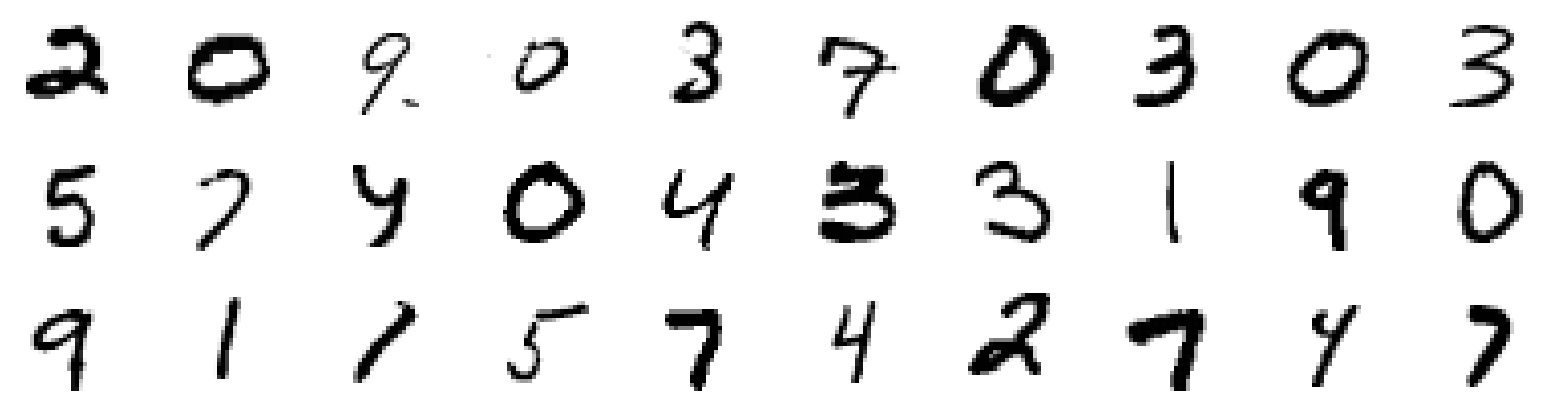

In [32]:
# Take a look at the first 30 actual digits

view_digits(X_test)

### Observations:

* We scored a slightly lower accuracy (0.9937) compared to the original LeNet-5 model above (0.9969).
* But we did decrease validation loss significantly from 0.0708 to 0.0485.
* Looking at the first 30 digits of the test set, the modified LeNet-5 model was able to predict the 0 correctly (at Imageid 3).

---

<a class="anchor" id="section-seven"></a>
## 7. Conclusion

As a whole, this notebook focused on building the LeNet-5 architecture in order to predict the labels of handwritten digits from the MNIST dataset. We explored several regularization techniques like data augmentation, batch normalization, dropout and early stopping. 

Furthermore, we modified the model by making adjustments to the activation function, pooling layers and kernel size. This was useful in reducing computation costs, preventing overfitting and creating predictions that will generalize better.

I post notebooks here on Kaggle and GitHub every week.

If you enjoyed this so far, please drop me a follow or an upvote!
Also, if you have any questions, feel free to reach out and I'll try my best to help you out :)

### References

* [Gradient-Based Learning Applied to Document Recognition](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)
* [LeNet with Tensorflow](https://gist.github.com/mrgrhn/c6d2a157ebfc883e462f2d6e2ce2e3ce#file-lenet_tensorflow-ipynb)
* [Keras ImageDataGenerator and Data Augmentation](https://pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/)